# The Hamblog
By Kyle Hambrook

# Hypothesis Testing for Correlation: Asymptotic Methods, Part 1.

### I. Hypothesis Test for Correlation $\rho$


We will consider the problem of testing whether a given hypothesis is true. In such problems, the hypothesis tested is the called null hypothesis and denoted by $H_0$.

Let $X$ and $Y$ be random variables. The correlation is $\rho = \rho(X,Y)$. We will consider the problem of testing the null hypothesis 
$$
H_0: \rho = 0.
$$
We will do so by calculating a $p$-value. The $p$-value will be based on the sample correlation $r_n$, and we will consider asymptotic methods for calculating it.

### II. The $p$-value Based on $r_n$

Let $X_1,\ldots,X_n$ and $Y_1,\ldots,Y_n$ be random samples of $X$ and $Y$. Let $$r_n = r_n(X_1,\ldots,X_n,Y_1,\ldots,Y_n)$$ be the sample correlation.

Let $r_n'$ denote an observed value (or realization) of $r_n$. Precisely, $$r_n' = r_n(X_1(\omega'),\ldots, X_n(\omega'),Y_1(\omega'),\ldots,Y_n(\omega'))$$ for some fixed outcome $\omega'$ in the sample space.

Informally, the $p$-value is the probability of $r_n$ being at least as extreme as the observed value $r_n'$ assuming $H_0$ is true. What "extreme" means depends on the distribution of $r_n$. We give a precise defintion of the $p$-value below, but first we discuss its meaning.

A small $p$-value is often as __evidence__ against the null hypothesis $H_0$. However, the $p$-value is __not__ the probability that $H_0$ is true, and it is __not__ the probability of $H_0$ given the observed data. <!--It is __not__ the probability of $r_n$ being equal to the observed value assuming that $H_0$ is true.-->

The following figure (borrowed from wikipedia) helps illustrate the concept of $p$-value.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/P-value_in_statistical_significance_testing.svg" alt="alt text" style="width: 400px;" title="Logo Title Text 1">

If $r_n' > 0$, the one-sided $p$-value is
$$
P(r_n \geq r_n' \; | \;  H_0).
$$
It is the area of the right-tail region under the standard normal pdf to the right of $\sqrt{n} r_n'$ (assuming the asymptotic approximation for the distribution of $r_n$). 

If $r_n' < 0$, the one-sided $p$-value is
$$
P(r_n \leq r_n' \; | \;  H_0)
$$
It is the area of the left-tail region under the standard normal pdf to the left of $\sqrt{n} r_n'$ (assuming the asymptotic approximation for the distribution of $r_n$). 

The two-sided $p$-value is
$$
P(r_n \leq -|r_n'| \text{ or } r_n \geq |r_n'|  \; | \;  H_0).
$$ 
It is the area of the left-tail region under the standard normal pdf to the left of $-\sqrt{n}|r_n'|$ plus the area of the right-tail region to the right of $\sqrt{n}|r_n'|$ (assuming the asymptotic approximation for the distribution of $r_n$). 

For simplicity, we will focus on the one-sided $p$-value when $r_n' < 0$. For brevity, denote this $p$-value by
$$
p_n = P(r_n \leq r_n' \; | \;  H_0).
$$

### III. Asymptotic Distribution of Sample Correlation $r_n$

To compute the $p$-value
$$
p_n = P(r_n \leq r_n' \; | \;  H_0)
$$
we need the distribution of $r_n$. Unfortunately, the distribution of $r_n$ is not well-understood, in general. To get around this, we will use the asymptotic distribution of $r_n$ to calculate an approximate $p$-value.

The next theorem gives us the asymptotic distribution of $r_n$.

***

<strong> Theorem 1. </strong>
Assume $E(X^4) < \infty$, $E(Y^4) < \infty$. Let $(X_i)_{i=1}^{\infty} \sim_{iid} X$ and $(Y_i)_{i=1}^{\infty} \sim_{iid} Y$ be infinite random samples. Then
$$
\sqrt{n}(r_n-\rho) \rightarrow_d N_1(0,\phi^2),
$$
where $\phi$ is the positive number defined by 
$$
\phi^2 = \frac{1}{4}\rho^2( E(X_{\ast}^4) + E(Y_{\ast}^4) + 2E(X_{\ast}^2 Y_{\ast}^2) ) 
- \rho(  E(X_{\ast}^3 Y_{\ast}) +  E(X_{\ast} Y_{\ast}^3)  )   +   E(X_{\ast}^2 Y_{\ast}^2),
$$
with 
$$X_{\ast} = (X - E (X))/\sqrt{\text{Var} (X)} \quad \text{and} \quad Y_{\ast} = (Y - E (Y))/\sqrt{\text{Var} (Y)}.$$

***

Notice that in general the variance $\phi^2$ of the limiting distribution depends on higher moments of $(X,Y)$. 

However, if the null hypothesis $H_0: \rho = 0$ is true, the variance of the limiting distribution is 
$$
\phi^2 = E(X_{\ast}^2 Y_{\ast}^2) 
= E(X_{\ast}^2) E(Y_{\ast}^2) 
= \frac{\text{Var}(X)}{\text{Var}(X)} \cdot \frac{\text{Var}(Y)}{\text{Var}(Y)}
=1.
$$
Therefore
$$
\sqrt{n}r_n \rightarrow_d N_1(0,1) \quad \text{ given } H_0,
$$
and so
$$
\lim_{n \to \infty} p_n = \lim_{n \to \infty} P(r_n \leq r_n' \; | \;  H_0) = \Phi(\sqrt{n} r_n'),
$$
where $\Phi$ is the standard normal cumulative distribution function (cdf).

The asymptotic approximation for the $p$-value is
$$
p_n \approx \Phi(\sqrt{n} r_n').
$$

### V. Python Example 1. Convergence of $p$-value.

In Python Example 1, we will test the asymptotic approximation by repeated sampling. 

Here are the steps:

1. Choose a distribution for $(X,Y)$ with $\rho(X,Y) = 0$ ($H_0$ true). We'll use a multi-variate normal distribution.
2. Choose a value of $n$.  
3. Assume $\sqrt{n}r_n' = -1.64485$, where $r_n'$ is a realization of $r_n$. So $\Phi(\sqrt{n}r_n') \approx 0.05$.  
4. Draw a size-$n$ sample of $(X,Y)$ and compute $r_n$.
5. Repeat step 4 many times. Say $N$ times in total. We'll take $N=600.$
5. Record $K$ = number of times where $r_n \leq r_n'$. 
6. Treat $K/N$ as $p_n = P(r_n \leq r_n' \; | \;  H_0)$. By the law of large numbers, $K/N$ converges to $p_n$ as $N$ gets large.
7. Repeat steps 2 to 6 several times.
8. Plot $p_n$ vs $n$. Also draw the horizontal line for $\Phi(\sqrt{n}r_n') = \Phi(-1.645) \approx 0.05$. 

Phi(sqrt(n)r'_n) = Phi(-1.64485) =  0.0499998583899  (horizontal line)
(X,Y) multivariate normal, true correlation rho(X,Y) =  0

p_n vs n


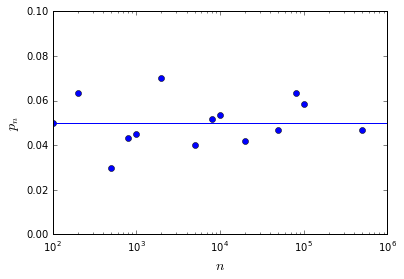

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

#np.random.seed(seed=45607)

def samp_corr( X,Y ):
    #X,Y vectors length n
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    numerator = np.mean((X-mean_X)*(Y-mean_Y))
    denominator = np.sqrt(np.mean((X-mean_X)**2) * np.mean((Y-mean_Y)**2))
    return numerator/denominator;

rho = 0
cov = np.array( [[1,rho],[rho,1]] )
a=-1.644855
N=600

pn = []
samplesizes = np.sort([10**k for k in range(2,6)] 
                      + [5*10**k for k in range(2,6)]
                      + [2*10**k for k in range(2,5)] 
                      + [8*10**k for k in range(2,5)]
                     ) 
#samplesizes=[10**2]
for n in samplesizes:
    rn_prime = a/np.sqrt(n) #sqrt(n)rn_prime = -1.645
    K=0.0
    for j in xrange(1,N+1):
        XY = np.random.multivariate_normal([0,0],cov,n)
        X = XY[:,0]
        Y = XY[:,1]
        rn = samp_corr(X,Y)
        if rn <= rn_prime:
            K=K+1
    pn.append(K/N)
Phi = norm.cdf(a)

print "Phi(sqrt(n)r'_n) = Phi(-1.64485) = ", Phi, " (horizontal line)"
print "(X,Y) multivariate normal, true correlation rho(X,Y) = ",rho
print ""
print "p_n vs n"

    
fig = plt.figure()
ax = plt.gca()
plt.plot(samplesizes,pn,"o")
plt.axhline(Phi)
plt.ylim([0,.10])
ax.set_xlabel(r'$n$',fontsize=14)
ax.set_ylabel(r'$p_n$',fontsize=14)
ax.set_xscale('log') 
#ax.text(-3, 80, "Phi(sqrt(n)r'_n) = Phi(-1.96) = ",fontsize=15)

The plot indicates the convergence
$$
p_n \to \Phi(\sqrt{n} r_n').
$$

### VI. Python Example 2. Probability of Type 1 Error.

In Python Example 2, we will test the asymptotic approximation another way. Namely by looking at the probability of Type 1 error. To explain the test, first we need some theory.

Roughly, a Type 1 error occurs when the $p$-value says reject $H_0$, but $H_0$ is actually true.

Fix $\alpha \in (0,1)$. If $p_n \leq \alpha$ and the null hypothesis $H_0$ is true, we say we have a Type 1 error at significance level $\alpha$.  For example, if $p_n \leq 0.05$ but $H_0$ is true, we have a Type 1 error at significance level $5\%$. Remember that the statement $p_n \leq \alpha$ is viewed as strong evidence against the $H_0$ when $\alpha$ is small.

Remember that a random variable is just a (measurable) function from the sample space to the real numbers. The $p$-value $p_n$ can be viewed as a random variable.  To each outcome $\omega'$ in the sample space, assign the real number
$$
p_n(\omega') = P(r_n \leq r_n' \; | \;  H_0)
$$
where $r_n' = r_n(X_1(\omega'),\ldots, X_n(\omega'),Y_1(\omega'),\ldots,Y_n(\omega'))$.

---

<strong>Theorem 2. </strong>
The $p$-value $p_n$ is uniformly distributed on $[0,1]$ under the null hypothesis: $P(p_n \leq \alpha \; | \;  H_0) = \alpha$ for all $\alpha \in [0,1]$.

---


According to Theorem 2, the probability of a Type 1 error at signifiance level $\alpha$ is 
$$P(p_n \leq \alpha \; | \;  H_0) = \alpha.$$ 
<!--We want to compare $P(p_n \leq \alpha) = \alpha$ to $P(\Phi(\sqrt{n} r_n') \leq \alpha)$-->
Since the asymptotic approximation is 
$$
p_n \to \Phi(\sqrt{n} r_n'), 
$$
we want to check whether $$P(\Phi(\sqrt{n} r_n' ) \leq \alpha \; | \;  H_0) \to \alpha.$$ 

Here's how will we do it:

1. Choose a distribution for $(X,Y)$ with $\rho(X,Y) = 0$ ($H_0$ true). We'll use a multi-variate normal distribution
2. Choose $\alpha \in (0,1)$. We'll take $\alpha = 0.05$. 
3. Choose a value of $n$.
4. Sample from $(X,Y)$ and compute $\Phi( \sqrt{n} r_n')$
5. Repeat Step 4 many times, say $N$ times in total. Record $K$ = number of times $\Phi( \sqrt{n} r_n') \leq \alpha$. We'll take $N=600.$
6. Treat $K / N$ as $P(\Phi( \sqrt{n} r_n') \leq \alpha \; | \;  H_0)$. (By the law of large numbers, $K/N$ converges to $P(\Phi( \sqrt{n} r_n') \leq \alpha \; | \;  H_0)$ as $N$ gets large.)
7. Repeat 3-6 for several values of $n$. 
8. Plot $P(\Phi( \sqrt{n} r_n') \leq \alpha \; | \;  H_0)$ vs $n$. Also plot the horizontal line $\alpha$ vs $n$. 



alpha = 0.05  (horizontal line)
(X,Y) multivariate normal, true correlation rho(X,Y) =  0

P(Phi(sqrt(n) r'_n ) <= alpha | H_0) vs n


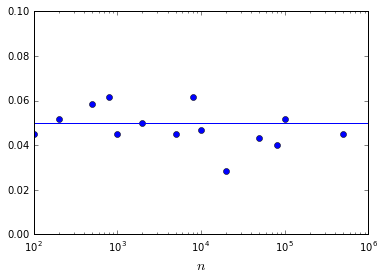

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

#np.random.seed(seed=456788)

def samp_corr( X,Y ):
    #X,Y vectors length n
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    numerator = np.mean((X-mean_X)*(Y-mean_Y))
    denominator = np.sqrt(np.mean((X-mean_X)**2) * np.mean((Y-mean_Y)**2))
    return numerator/denominator;

rho = 0
cov = np.array( [[1,rho],[rho,1]] )
N=600


#alphavalues = [0.01,0.05,0.1]
alpha = 0.05
samplesizes = np.sort([10**k for k in range(2,6)] 
                      + [5*10**k for k in range(2,6)]
                      + [2*10**k for k in range(2,5)] 
                      + [8*10**k for k in range(2,5)]
                     ) 
#samplesizes=[1000]
prob_n = []
for n in samplesizes: 
    K=0.0
    for j in xrange(1,N+1):
        XY = np.random.multivariate_normal([0,0],cov,n)
        X = XY[:,0]
        Y = XY[:,1]
        rn_prime = samp_corr(X,Y)
        if norm.cdf(np.sqrt(n)*rn_prime) <= alpha:
            K=K+1
    prob_n.append(K/N)
        
print "alpha =", alpha, " (horizontal line)" 
print "(X,Y) multivariate normal, true correlation rho(X,Y) = ",rho
print ""
print "P(Phi(sqrt(n) r'_n ) <= alpha | H_0) vs n"
fig = plt.figure()
ax = plt.gca()
plt.plot(samplesizes,prob_n,"o")
plt.axhline(alpha)
plt.ylim([0,alpha*2])
ax.set_xlabel(r'$n$',fontsize=14)
#ax.set_ylabel("Prob(alpha,n)")
ax.set_xscale('log') 

The plot indicates that 
$$
P(\Phi(\sqrt{n} r_n' ) \leq \alpha \; | \;  H_0) \approx \alpha.
$$
However, the convergence 
$$
P(\Phi(\sqrt{n} r_n' ) \leq \alpha \; | \;  H_0) \to \alpha,
$$
appears fairly slow.